# Notebook 2 - STATS MODELS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.tools import add_constant

* Gender : Male / Female
* Height : Number (cm)
* Weight : Number (Kg)
* Index :
    * 0 - Extremely Weak
    * 1 - Weak
    * 2 - Normal
    * 3 - Overweight
    * 4 - Obesity
    * 5 - Extreme Obesity

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/Applied-statistics/main/bmi.csv')
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
# Get the number of unique work classes
unique_workclasses = data['Index'].nunique()

print(f'There are {unique_workclasses} unique work classes in the dataset.')

There are 6 unique work classes in the dataset.


In [4]:
# Get the unique work classes and their counts
unique_workclasses = data['Index'].value_counts()

print(unique_workclasses)

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
# Map Gender to binary values: Male -> 1, Female -> 0
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [7]:
data.groupby(by="Index").describe()

Gender                                              Height              \
       count      mean       std  min  25%  50%  75%  max  count        mean   
Index                                                                          
0       13.0  0.461538  0.518875  0.0  0.0  0.0  1.0  1.0   13.0  187.538462   
1       22.0  0.681818  0.476731  0.0  0.0  1.0  1.0  1.0   22.0  184.772727   
2       69.0  0.405797  0.494643  0.0  0.0  0.0  1.0  1.0   69.0  174.260870   
3       68.0  0.470588  0.502845  0.0  0.0  0.0  1.0  1.0   68.0  175.985294   
4      130.0  0.453846  0.499791  0.0  0.0  0.0  1.0  1.0  130.0  173.876923   
5      198.0  0.530303  0.500346  0.0  0.0  1.0  1.0  1.0  198.0  160.979798   

       ...                Weight                                              \
       ...     75%    max  count        mean        std   min     25%    50%   
Index  ...                                                                     
0      ...  193.00  198.0   13.0   51.692308   2.323238  50.0   50.00   50.0   
1      ...  192.50  196.0   22.0   59.409091   5.270394  50.0   56.00   59.5   
2      ...  185.00  199.0   69.0   69.086957  12.062020  50.0   59.00   68.0   
3      ...  188.00  198.0   68.0   86.882353  15.917258  52.0   71.75   89.5   
4      ...  186.75  199.0  130.0  107.953846  21.463819  66.0   90.50  109.5   
5      ...  171.00  196.0  198.0  132.888889  21.099421  79.0  118.25  139.5   

                      
          75%    max  
Index                 
0       54.00   57.0  
1       62.00   69.0  
2       79.00   99.0  
3      100.00  115.0  
4      122.75  156.0  
5      149.75  160.0  

[6 rows x 24 columns]

### Our dataset is of BMI and is divided into groups from 0-5 that describe in which region the BMI of each subject is, therefore, in each individual group, there will be a high relationship between height and weight because the BMI in each group is relatively similar. Therefore, we will look in each group separately at the relationship between height and weight.

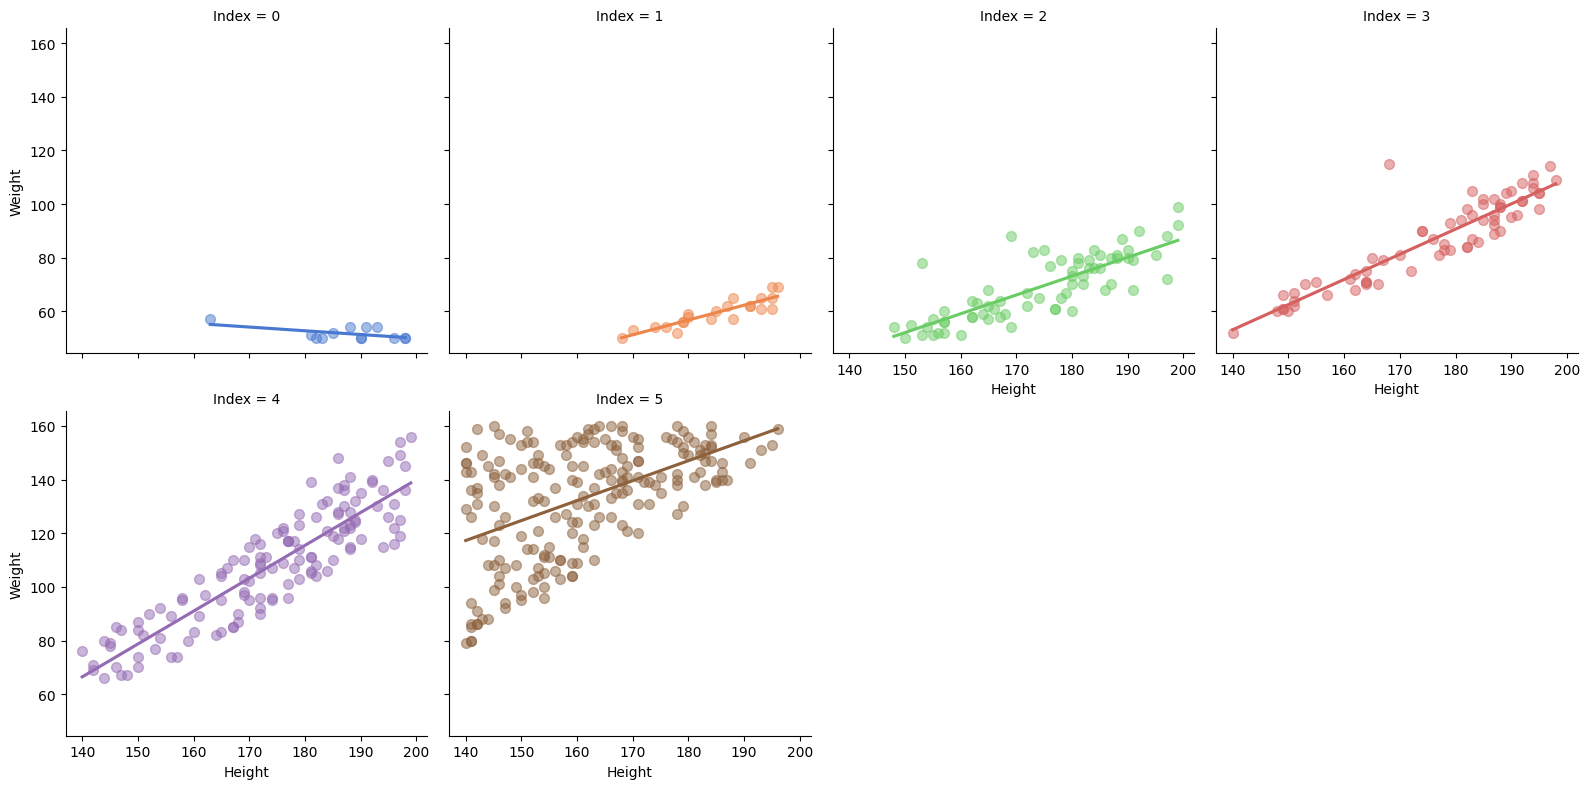

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset has the columns 'Height' as x, 'Weight' as y, and 'Gender' for col and hue
sns.lmplot(
    data=data, x="Height", y="Weight", col="Index", hue="Index",
    col_wrap=4, palette="muted", ci=None,
    scatter_kws={"s": 50, "alpha": 0.5}, height=4
)

# Show the plot
plt.show()

Insights:
* Index 0 - data appears to fit the line pretty good, no outliers deteced
* Index 1 - the data fits the line pretty good, there some points the are a little bit further from the line, but overall good fit.
* Index 2 - althoug many points do fit the data, we see that there are clearly outleirs the doesn't fit.
* Index 3 - there are some outliers with high weight values which makes the line biased, how ever, the points are relatively compressed so the line almost fit.
* Index 4 + Index 5 - the data doesn't appear to have many outliers but they are also not compressed so the line goes in the middle

In [9]:
df0 = data[data["Index"] == 0]
df0

,Gender,Height,Weight,Index
60,0,191,54,0
62,1,193,54,0
79,1,181,51,0
85,1,198,50,0
99,0,190,50,0
150,0,196,50,0
214,0,185,52,0
224,1,188,54,0
244,0,183,50,0
273,0,163,57,0


# Ordinary Least Squares

In [10]:
import statsmodels.api as sm
import numpy as np

# Assuming df0 is already defined
design = np.column_stack((df0["Height"], np.ones(len(df0))))

# Inspect the first 5 rows of the design matrix
print(design[0:5, :])

[[191.   1.]
 [193.   1.]
 [181.   1.]
 [198.   1.]
 [190.   1.]]


In [11]:
# Fit the OLS model
results = sm.OLS(df0["Weight"], design).fit()

# Print the summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     5.026
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0466
Time:                        15:58:51   Log-Likelihood:                -26.438
No. Observations:                  13   AIC:                             56.88
Df Residuals:                      11   BIC:                             58.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1393      0.062     -2.242      0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)


# Insights

In [12]:
print(results.predict([2, 1]),
      results.params["x1"]*2 + results.params["const"]*1,
sep="\n")

[77.5319524]
77.53195240193915


In [13]:
import statsmodels.api as sm
import numpy as np

results_dict = {}
for ds in np.sort(data["Index"].unique()):
    print("The Index is " + str(ds))  # Convert the Index to string for printing
    df1 = data[data["Index"] == ds]
    design = np.column_stack((df1["Height"], np.ones(len(df1))))
    results_dict[ds] = sm.OLS(df1["Weight"], design).fit()
    print(results_dict[ds].summary())

The Index is 0
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     5.026
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0466
Time:                        15:58:51   Log-Likelihood:                -26.438
No. Observations:                  13   AIC:                             56.88
Df Residuals:                      11   BIC:                             58.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1393      0.062     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)


# Residual Plots

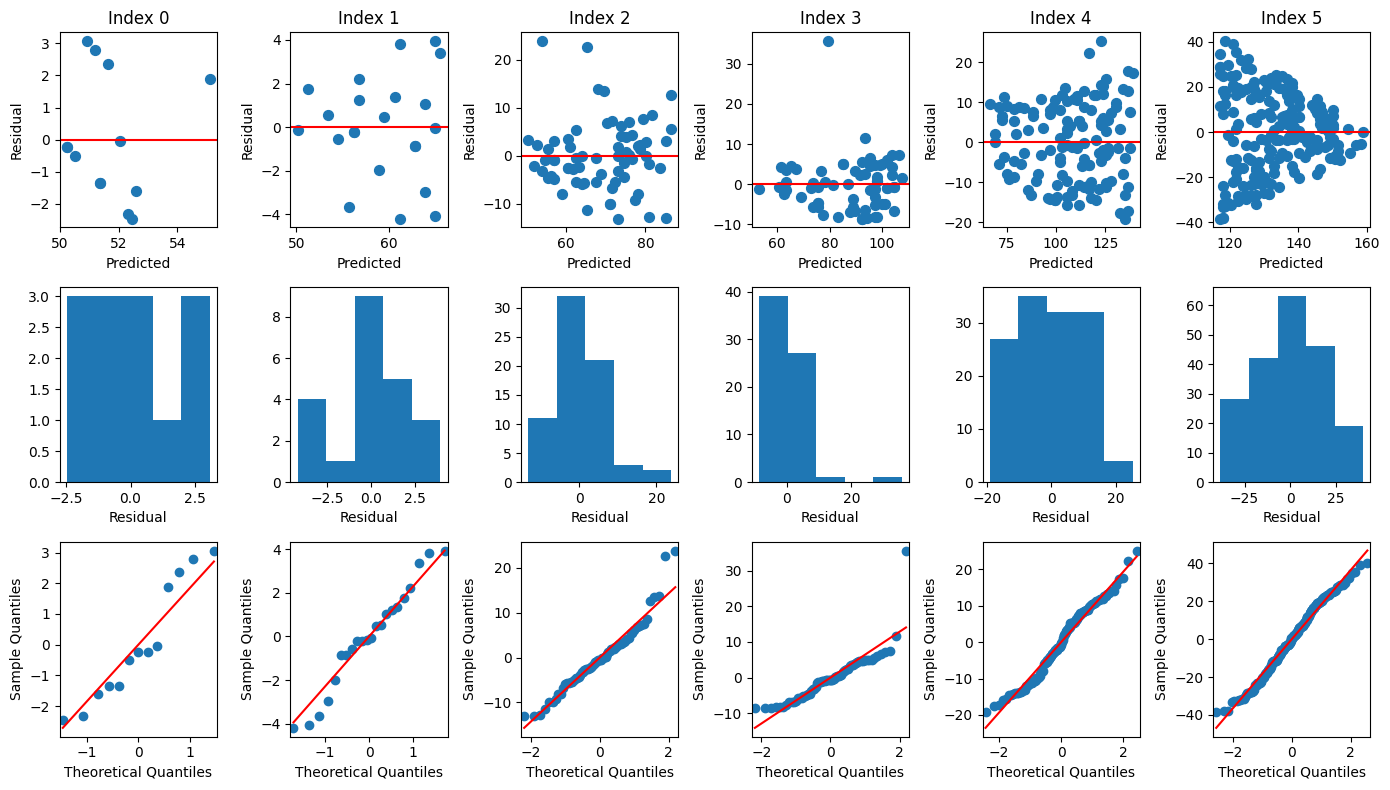

In [14]:
# Prepare the subplots with 3 rows and 4 columns
fig, axes = plt.subplots(3, 6, figsize=(14, 8))

# Iterate through the sorted unique indices
for i, ds in enumerate(np.sort(data["Index"].unique())):
    row = i // 6  # Determine the row index
    col = i % 6   # Determine the column index
    
    ax = axes[0, col]  # Access the correct subplot for scatter plot
    results = results_dict[ds]
    ax.scatter(results.predict(), results.resid, s=50)
    ax.axhline(0, color="red")
    ax.set_title(f'Index {ds}')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Residual")

    # Histogram of residuals
    ax = axes[1, col]  # Access the correct subplot for histogram
    ax.hist(results.resid, bins=5)
    ax.set_xlabel("Residual")

    # Q-Q plot of residuals
    ax = axes[2, col]  # Access the correct subplot for Q-Q plot
    sm.graphics.qqplot(results.resid, line="s", ax=ax)

plt.tight_layout()
plt.show()

### Top Row - Residuals vs. Predicted Values:

* Each scatter plot in the top row shows the residuals (differences between observed and predicted values) on the vertical axis against the predicted values on the horizontal axis.

* Middle Row - Histogram of Residuals:
    Each histogram in the middle row shows the distribution of residuals.

* Bottom Row - Q-Q Plots:
    Each Q-Q (quantile-quantile) plot compares the quantiles of the residuals with the quantiles of a normal distribution.

Strengths: The residuals for Index 0, 1, and 2 appear to be well-behaved, with no obvious issues. The residuals are fairly normally distributed, and the Q-Q plots suggest that the normality assumption is largely met, particularly for Index 2.

Concerns: For Index 3, 4, and 5, there are signs of potential issues:

Index 4 might have heteroscedasticity, as indicated by the increasing spread of residuals with predicted values.
Index 4 and 5 show deviations in the Q-Q plots, suggesting that the normality assumption might not hold perfectly for these datasets. This could potentially affect the reliability of inferences drawn from these models.

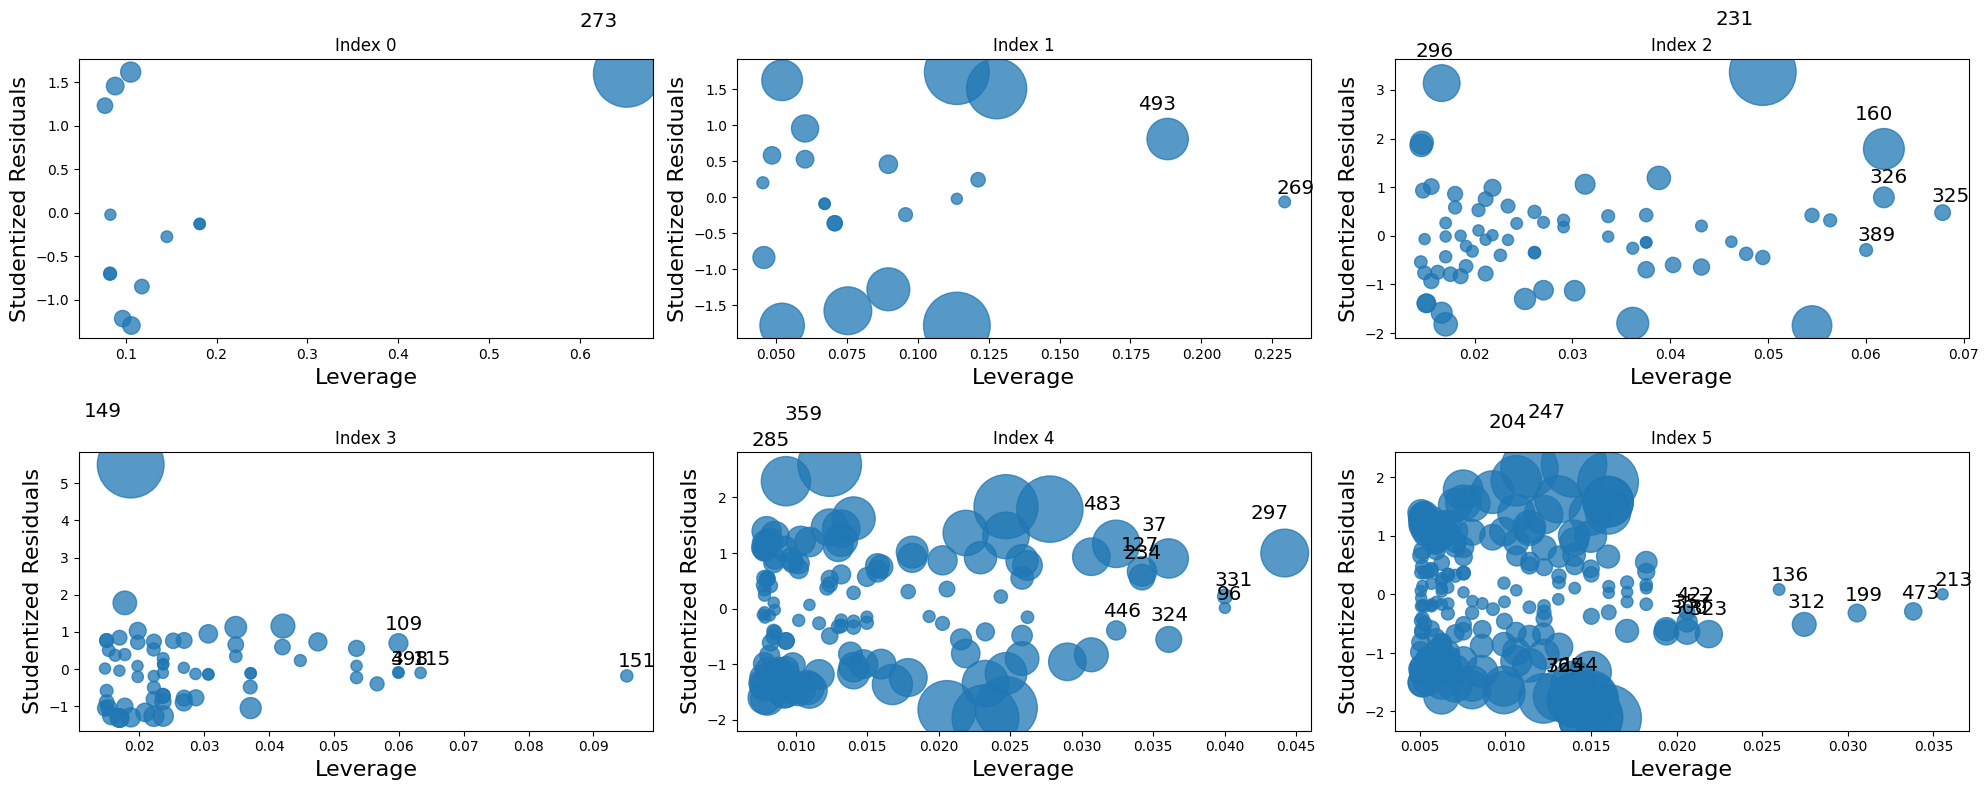

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get the number of unique Index values
num_indices = len(data["Index"].unique())

# Define the number of columns (3 per row)
cols = 3
# Calculate the number of rows needed based on the number of unique indices
rows = (num_indices + cols - 1) // cols

# Create the grid with calculated rows and 3 columns
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the sorted unique indices and plot influence plots
for i, ds in enumerate(np.sort(data["Index"].unique())):
    ax = axes[i]
    results = results_dict[ds]
    results.get_influence().plot_influence(ax=ax)
    ax.set_title(f'Index {ds}')

# Hide any unused subplots if the number of indices is not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

the following points are likely outliers:

* 273: This appears in Index 0, with a high leverage and large standardized residual.
* 493: This appears in Index 1 and is a large point in terms of leverage and residuals.
* 296: This appears in Index 2, with both high leverage and a large residual.
* 109, 285, 446: These points appear in Index 3 and Index 4, respectively, showing high influence.
* 231: In Index 2, also shows as influential with relatively large Cook’s distance.
* 204: Appears in Index 5, with a high standardized residual and high leverage.


we'll drop the outliers and continue regression

In [16]:
# Filter the dataset for the specific outliers
outliers = {
    0: [273],          # Index 0
    1: [493],          # Index 1
    2: [296, 231],     # Index 2
    3: [109],          # Index 3
    4: [285, 446],     # Index 4
    5: [204]           # Index 5
}

# Create a new DataFrame without the outliers
df_clean = data.copy()

for idx, outlier_list in outliers.items():
    # For each 'Index', drop the rows corresponding to the outliers
    df_clean = df_clean[~((df_clean['Index'] == idx) & (df_clean.index.isin(outlier_list)))]

# Display the cleaned dataset
df_clean.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [17]:
results_dict = {}
for ds in np.sort(data["Index"].unique()):
    print("The Index is " + str(ds))  # Convert the Index to string for printing
    df1 = data[data["Index"] == ds]
    design = np.column_stack((df1["Height"], np.ones(len(df1))))
    results_dict[ds] = sm.OLS(df1["Weight"], design).fit()
    print(results_dict[ds].summary())

The Index is 0
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     5.026
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0466
Time:                        15:58:52   Log-Likelihood:                -26.438
No. Observations:                  13   AIC:                             56.88
Df Residuals:                      11   BIC:                             58.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1393      0.062     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)


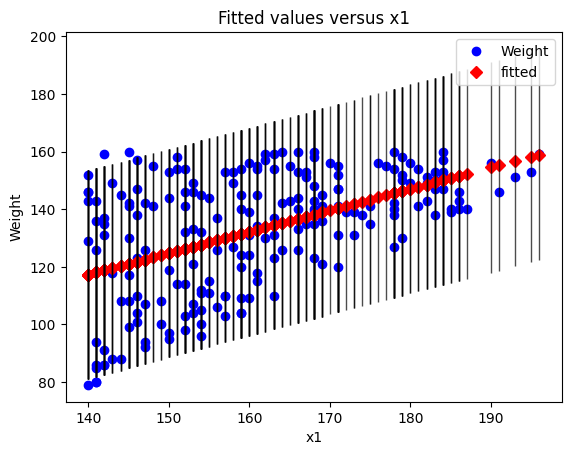

In [18]:
sm.graphics.plot_fit(results,0);

1. Blue Dots (Actual Values):
    * The blue dots represent the actual observed values of Weight at various levels of x1. These are the data points from your dataset.
2. Red Line (Fitted Line):
    * The red line represents the predicted or fitted values of Weight from your regression model. It shows the relationship the model has learned between the predictor variable x1 and the target variable Weight.
    * The line is sloped, indicating that the regression model has found a relationship between x1 and Weight (in this case, a negative slope, which matches the coefficient for x1 in your model).
3. Vertical Lines (Residuals):
    * The vertical lines represent the residuals, which are the differences between the actual values (blue dots) and the predicted (fitted) values on the red line.
    * The length of each vertical line indicates how far off the model’s prediction is from the actual observed value. Larger lines suggest larger prediction errors (larger residuals).

many of the points appear to be somewhat scattered around the fitted line, with some blue points far away from the red line (larger residuals). This suggests that while the model captures some of the variation in Weight, it has some prediction errors, indicating that the fit isn’t perfect. This aligns with the relatively low R-squared value (0.314) from your model’s summary, meaning that the model explains about 31.4% of the variation in Weight.


## Feature engineering

LETS GENERATE QUADARATIC DATASET

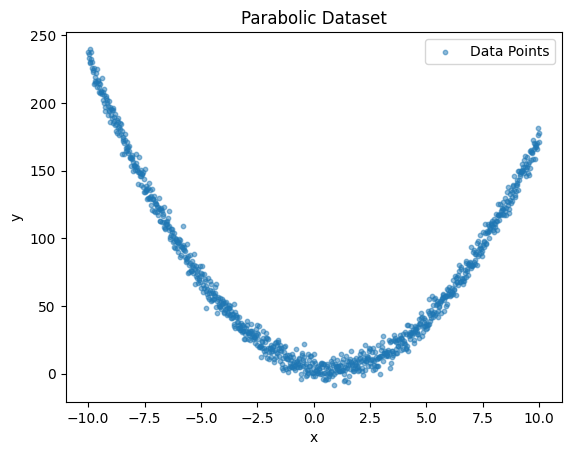

In [19]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate x values
x = np.linspace(-10, 10, 1000)

# Generate y values using a parabolic relationship y = a*x^2 + b*x + c + noise
a, b, c = 2, -3, 5  # Coefficients for the quadratic equation
noise = np.random.normal(0, 5, size=x.shape)  # Add some noise
y = a * x**2 + b * x + c + noise

# Create a DataFrame
dataset = pd.DataFrame({'x': x, 'y': y})

# Save dataset to CSV
dataset.to_csv('parabolic_dataset.csv', index=False)

# Plot the dataset to visualize
plt.scatter(x, y, s=10, alpha=0.5, label='Data Points')
plt.title("Parabolic Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [20]:
dataset

,x,y
0,-10.00000,237.483571
1,-9.97998,233.448619
2,-9.95996,236.519927
3,-9.93994,240.039781
4,-9.91992,230.398615
...,...,...
995,9.91992,170.644361
996,9.93994,181.773425
997,9.95996,176.725939
998,9.97998,171.404166


In [21]:
X = dataset['x']  # original features
y = dataset['y']
X = sm.add_constant(X)  # adds an intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     81.68
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           8.14e-19
Time:                        15:58:52   Log-Likelihood:                -5513.3
No. Observations:                1000   AIC:                         1.103e+04
Df Residuals:                     998   BIC:                         1.104e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.8968      1.899     37.856      0.0

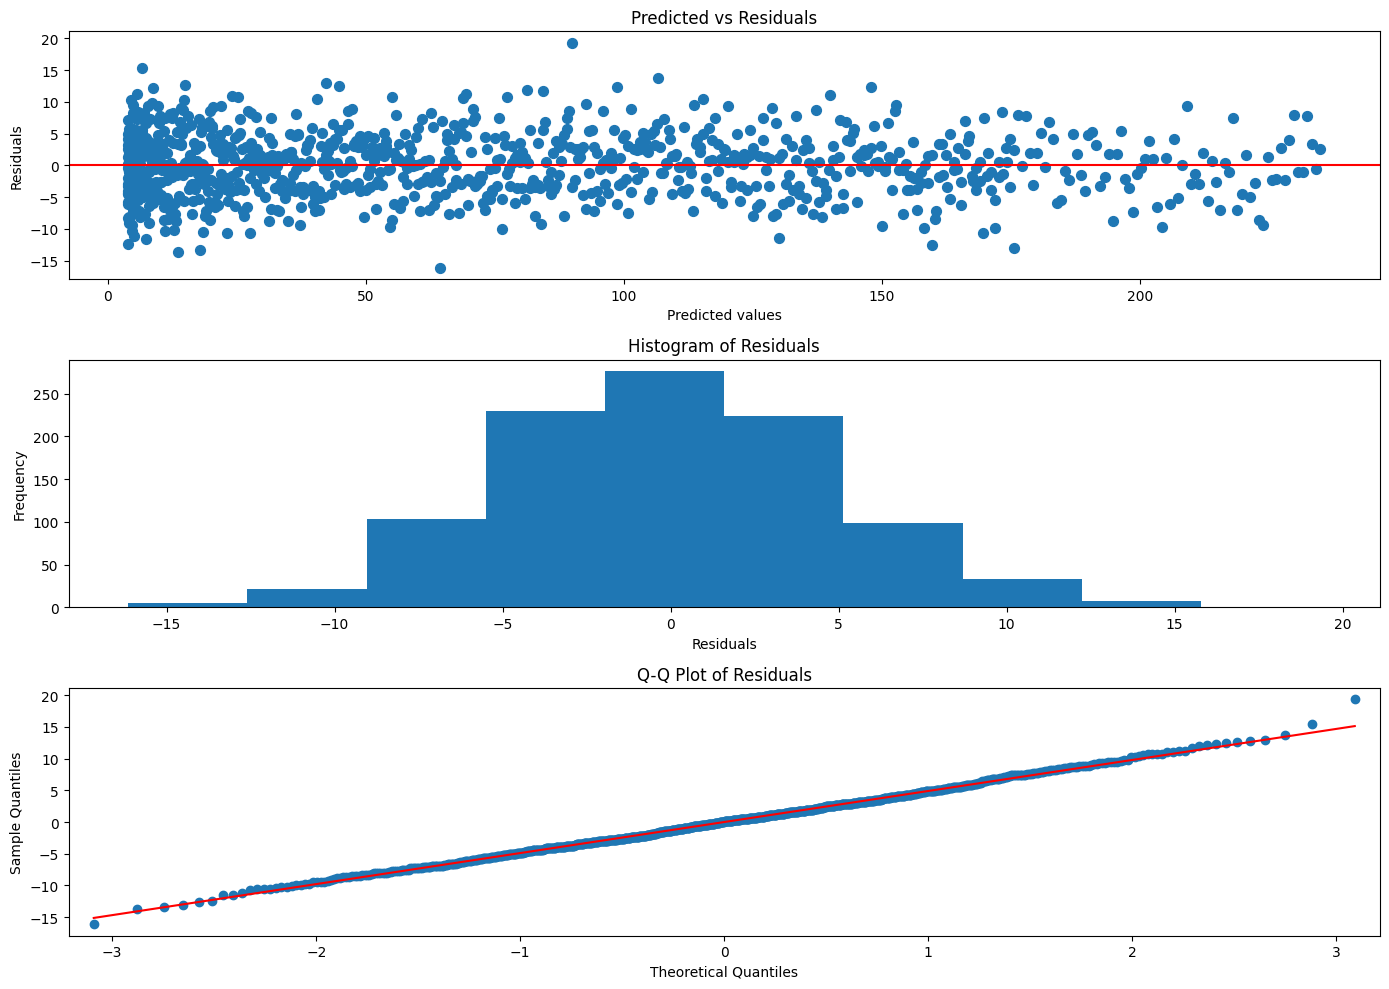

In [22]:
# Load the generated dataset
dataset = pd.read_csv('parabolic_dataset.csv')

# Extract x and y values
X = dataset[['x']]  # Predictor
y = dataset['y']  # Target variable

# Create polynomial features (degree 2 for quadratic fit)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict values using the model
y_pred = model.predict(X_poly)

# Calculate residuals
residuals = y - y_pred

# Fit statsmodels regression for better residual analysis
X_sm = sm.add_constant(X_poly)
model_sm = sm.OLS(y, X_sm).fit()

# Set up the grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Predicted vs Residuals
ax = axes[0]
ax.scatter(y_pred, residuals, s=50)
ax.axhline(0, color="red")
ax.set_title("Predicted vs Residuals")
ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")

# Plot 2: Histogram of Residuals
ax = axes[1]
ax.hist(residuals, bins=10)
ax.set_title("Histogram of Residuals")
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")

# Plot 3: Q-Q plot for Residuals
ax = axes[2]
sm.graphics.qqplot(residuals, line="s", ax=ax)
ax.set_title("Q-Q Plot of Residuals")

# Tight layout to improve spacing
plt.tight_layout()

# Show the plots
plt.show()

### Residual Analysis after Polynomial Regression

1. **Predicted vs. Residuals Plot**:
   - This plot shows the residuals plotted against the predicted values.
   - The red line represents zero residuals (perfect predictions).
   - The scatter of points around the line indicates the errors in the model. Ideally, the points should be randomly distributed with no apparent pattern. Any pattern suggests the model might not fully capture the underlying data structure.

2. **Histogram of Residuals**:
   - The histogram shows the distribution of residuals.
   - A normal distribution (bell-shaped curve centered at zero) would indicate well-distributed errors.
   - In this case, the residuals seem centered, indicating balanced errors around zero, though checking for skewness is necessary.

3. **Q-Q Plot of Residuals**:
   - The Q-Q plot compares the residuals' distribution to a theoretical normal distribution.
   - Residuals ideally follow the red diagonal line, showing normality in the errors.
   - Deviations, especially in the tails, suggest that the residuals deviate from normality.

### Conclusion:
- While the residuals seem reasonably distributed around zero, the Q-Q plot shows deviations from normality, particularly at the ends. This suggests that the model could benefit from further refinement to improve fit and ensure a more normal distribution of residuals.

In [23]:

# Generate polynomial features (degree 2 for quadratic fit)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(dataset[['x']])

# Convert to DataFrame for readability
poly_df = pd.DataFrame(X_poly, columns=['x', 'x^2'])

# Combine with target variable 'y'
dataset_poly = pd.concat([poly_df, dataset['y']], axis=1)
print(dataset_poly.head())

          x         x^2           y
0 -10.00000  100.000000  237.483571
1  -9.97998   99.600000  233.448619
2  -9.95996   99.200802  236.519927
3  -9.93994   98.802406  240.039781
4  -9.91992   98.404811  230.398615


In [24]:
# Apply log transformation to 'y'
dataset['log_y'] = np.log1p(dataset['y'])  # log(y + 1) to avoid log(0) issues
print(dataset.head())

          x           y     log_y
0 -10.00000  237.483571  5.474300
1  -9.97998  233.448619  5.457236
2  -9.95996  236.519927  5.470252
3  -9.93994  240.039781  5.484962
4  -9.91992  230.398615  5.444142


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
# Discretize 'x' into 3 bins (low, medium, high)
dataset['x_binned'] = pd.cut(dataset['x'], bins=3, labels=["Low", "Medium", "High"])
print(dataset.head())

          x           y     log_y x_binned
0 -10.00000  237.483571  5.474300      Low
1  -9.97998  233.448619  5.457236      Low
2  -9.95996  236.519927  5.470252      Low
3  -9.93994  240.039781  5.484962      Low
4  -9.91992  230.398615  5.444142      Low


In [26]:
# Standardize 'x' values
scaler = StandardScaler()
dataset['x_scaled'] = scaler.fit_transform(dataset[['x']])
print(dataset.head())

          x           y     log_y x_binned  x_scaled
0 -10.00000  237.483571  5.474300      Low -1.730320
1  -9.97998  233.448619  5.457236      Low -1.726856
2  -9.95996  236.519927  5.470252      Low -1.723391
3  -9.93994  240.039781  5.484962      Low -1.719927
4  -9.91992  230.398615  5.444142      Low -1.716463


In [27]:
# Removing outliers based on IQR for 'x'
Q1 = dataset['x'].quantile(0.25)
Q3 = dataset['x'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
dataset_cleaned = dataset[(dataset['x'] >= lower_bound) & (dataset['x'] <= upper_bound)]
print(dataset_cleaned.head())

          x           y     log_y x_binned  x_scaled
0 -10.00000  237.483571  5.474300      Low -1.730320
1  -9.97998  233.448619  5.457236      Low -1.726856
2  -9.95996  236.519927  5.470252      Low -1.723391
3  -9.93994  240.039781  5.484962      Low -1.719927
4  -9.91992  230.398615  5.444142      Low -1.716463


In [28]:
# Target encoding based on binned 'x' values
x_bin_means = dataset.groupby('x_binned')['y'].mean()
dataset['x_binned_encoded'] = dataset['x_binned'].map(x_bin_means)
print(dataset.head())

          x           y     log_y x_binned  x_scaled x_binned_encoded
0 -10.00000  237.483571  5.474300      Low -1.730320       121.419843
1  -9.97998  233.448619  5.457236      Low -1.726856       121.419843
2  -9.95996  236.519927  5.470252      Low -1.723391       121.419843
3  -9.93994  240.039781  5.484962      Low -1.719927       121.419843
4  -9.91992  230.398615  5.444142      Low -1.716463       121.419843


/var/folders/3g/8s4nmsgx1lv5wd6ttt2_mwtc0000gn/T/ipykernel_64134/2555234125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_bin_means = dataset.groupby('x_binned')['y'].mean()


In [29]:
dataset

,x,y,log_y,x_binned,x_scaled,x_binned_encoded
0,-10.00000,237.483571,5.474300,Low,-1.730320,121.419843
1,-9.97998,233.448619,5.457236,Low,-1.726856,121.419843
2,-9.95996,236.519927,5.470252,Low,-1.723391,121.419843
3,-9.93994,240.039781,5.484962,Low,-1.719927,121.419843
4,-9.91992,230.398615,5.444142,Low,-1.716463,121.419843
...,...,...,...,...,...,...
995,9.91992,170.644361,5.145425,High,1.716463,81.895500
996,9.93994,181.773425,5.208247,High,1.719927,81.895500
997,9.95996,176.725939,5.180243,High,1.723391,81.895500
998,9.97998,171.404166,5.149842,High,1.726856,81.895500


In [30]:
design = np.column_stack((dataset['x']**2, dataset['x'], np.ones(len(dataset))))

# Fit an OLS regression model
results = sm.OLS(dataset['y'], design).fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 8.068e+04
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:58:53   Log-Likelihood:                -3006.2
No. Observations:                1000   AIC:                             6018.
Df Residuals:                     997   BIC:                             6033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0017      0.005    386.106      0.0

### Summary of Results Before and After Feature Selection

1. **Before Feature Selection**:
   - **R-squared**: 0.076, meaning the model explains only 7.6% of the variance in the target variable.
   - **Adj. R-squared**: 0.075, indicating that even after adjusting for the number of predictors, the model's explanatory power is very low.
   - **F-statistic**: 81.68 with a very low p-value (< 0.05), meaning the overall model is statistically significant, but it has weak explanatory power.
   - **Condition Number**: 5.78, indicating no severe multicollinearity issue before selection.

2. **After Feature Selection**:
   - **R-squared**: 0.994, indicating the model now explains 99.4% of the variance in the target variable, a significant improvement.
   - **Adj. R-squared**: 0.994, showing that even after adjusting for the number of predictors, the model's explanatory power is very strong.
   - **F-statistic**: 8.06e+04 with a very low p-value, meaning the model is highly statistically significant.
   - **Condition Number**: 67.2, slightly higher, but this increase suggests that multicollinearity was reduced.

### Conclusion:
- **Before Feature Selection**: The model had very poor explanatory power.
- **After Feature Selection**: The model's performance significantly improved, explaining almost all variance in the target variable. This demonstrates the effectiveness of feature selection in improving model performance.

# VIF & MULTICOLINEARITY

We will use another dataset, breast cancer dataset, to check multicolinearity & performing VIF

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/statistical-theory/main/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
# dropping unnecessary features
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [35]:
# Drop 'id' and set 'diagnosis' as the target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']  # Target variable

# Add a constant for the intercept
X = add_constant(X)

In [55]:
# Stack the design matrix with the features (including constant)
design = np.column_stack((df, np.ones(len(df))))

# Fit an OLS regression model
results = sm.OLS(df['diagnosis'], design).fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.883e+28
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:40:11   Log-Likelihood:                 17308.
No. Observations:                 569   AIC:                        -3.458e+04
Df Residuals:                     553   BIC:                        -3.451e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.246e-15   7.89e-15     -0.665      0.5

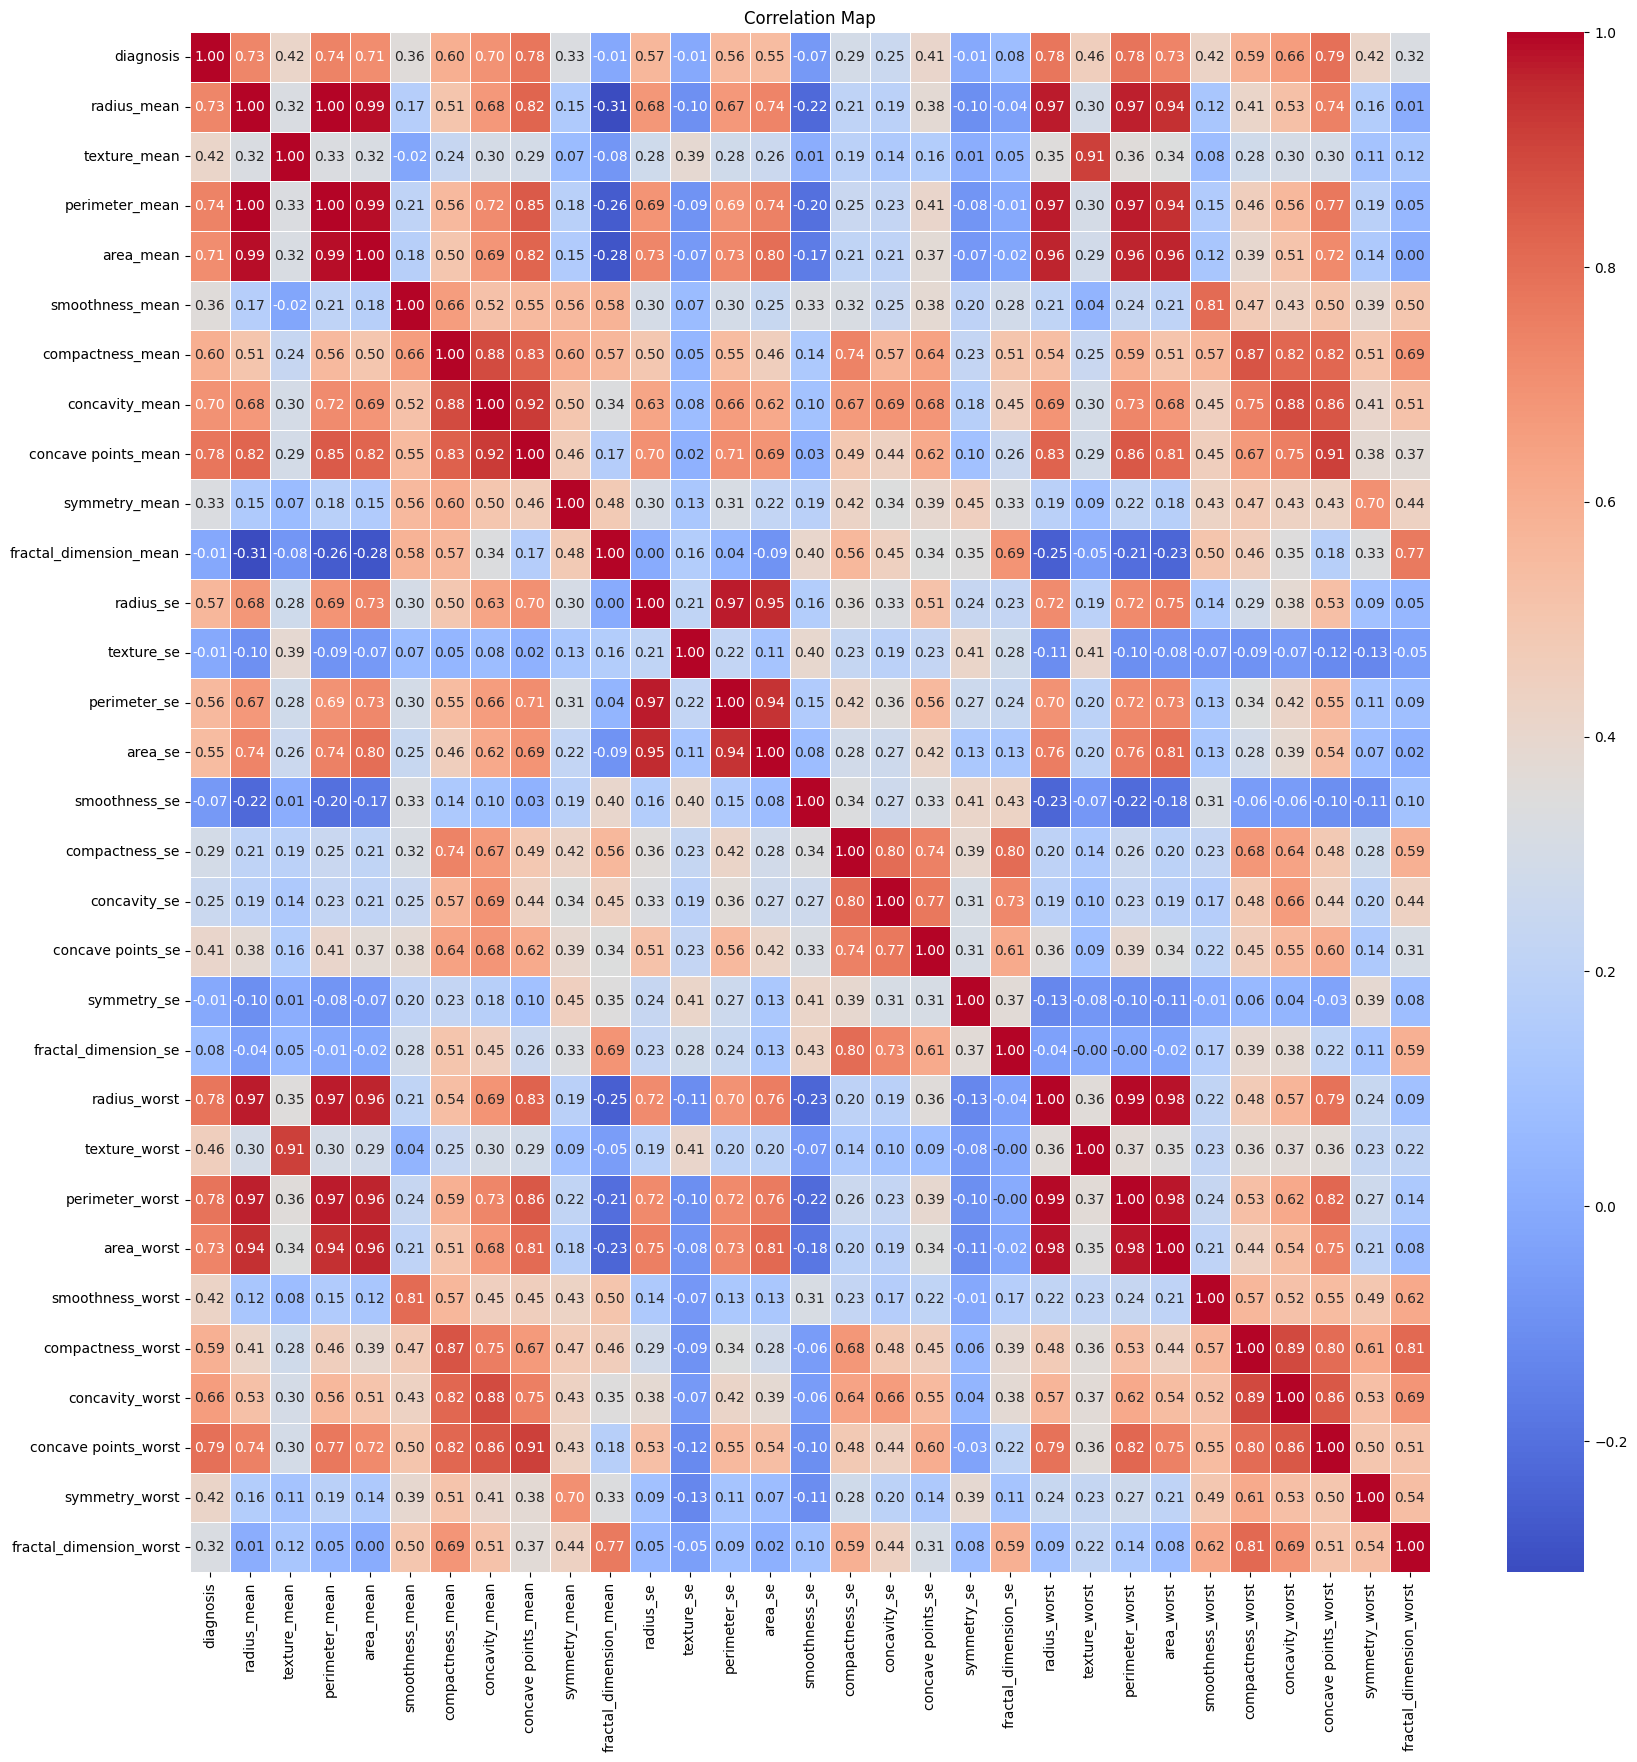

In [37]:
# correlation map
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), cmap="coolwarm", annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Optional: Drop any target or unrelated columns, if necessary
# df = df.drop(columns=['diagnosis'])

# Add a constant for the intercept
df = add_constant(df)

# Initialize DataFrame to store VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)

                    feature          VIF
0                     const  1945.673866
1                 diagnosis     4.431144
2               radius_mean  3817.259795
3              texture_mean    11.891280
4            perimeter_mean  3792.697001
5                 area_mean   348.115385
6           smoothness_mean     8.194309
7          compactness_mean    51.445960
8            concavity_mean    71.002747
9       concave points_mean    60.172431
10            symmetry_mean     4.220806
11   fractal_dimension_mean    15.756978
12                radius_se    75.737325
13               texture_se     4.205686
14             perimeter_se    70.398925
15                  area_se    41.196467
16            smoothness_se     4.070801
17           compactness_se    15.366350
18             concavity_se    15.914022
19        concave points_se    11.601253
20              symmetry_se     5.179151
21     fractal_dimension_se     9.724753
22             radius_worst   815.945630
23            te

VIF helps to check for multicollinearity among features. Features with a VIF above 10 are typically considered highly collinear.

we will perform feature selecetion, based on the VIF results

In [39]:
correlation_matrix = df.corr().abs()
threshold = 0.8
# Get the column names
columns = correlation_matrix.columns.tolist()

# Initialize an empty list to store the groups
groups = []

# A set to keep track of columns already grouped
grouped_columns = set()

# Iterate over each column to find groups
for i, col in enumerate(columns):
    if col in grouped_columns:
        continue

    # Start a new group
    current_group = [col]
    grouped_columns.add(col)

    # Compare with other columns
    for j in range(i + 1, len(columns)):
        other_col = columns[j]
        if other_col not in grouped_columns and abs(correlation_matrix[col][other_col]) > threshold:
            current_group.append(other_col)
            grouped_columns.add(other_col)

    # Add the group to the list of groups
    groups.append(current_group)


print(groups)

[['const'], ['diagnosis'], ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], ['texture_mean', 'texture_worst'], ['smoothness_mean', 'smoothness_worst'], ['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst'], ['symmetry_mean'], ['fractal_dimension_mean'], ['radius_se', 'perimeter_se', 'area_se'], ['texture_se'], ['smoothness_se'], ['compactness_se', 'concavity_se', 'fractal_dimension_se'], ['concave points_se'], ['symmetry_se'], ['symmetry_worst'], ['fractal_dimension_worst']]


In [40]:
features_of_interest = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                feature          VIF
2           radius_mean  3817.259795
4        perimeter_mean  3792.697001
5             area_mean   348.115385
9   concave points_mean    60.172431
22         radius_worst   815.945630
24      perimeter_worst   405.150023
25           area_worst   343.494355


In [41]:
df = df.drop(columns= ['perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], axis=1)

In [42]:
features_of_interest = ['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                 feature        VIF
7       compactness_mean  51.445960
8         concavity_mean  71.002747
27     compactness_worst  36.984867
28       concavity_worst  32.090394
29  concave points_worst  36.781339


In [43]:
df = df.drop(columns=['compactness_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst'], axis=1)

In [44]:
features_of_interest = ['texture_mean', 'texture_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

          feature        VIF
3    texture_mean  11.891280
23  texture_worst  18.606605


In [45]:
df = df.drop(columns=['texture_worst'], axis=1)

In [46]:
features_of_interest = ['smoothness_mean', 'smoothness_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

             feature        VIF
6    smoothness_mean   8.194309
26  smoothness_worst  10.925968


In [47]:
df = df.drop(columns=['smoothness_worst'], axis=1)

In [48]:
features_of_interest = ['compactness_se', 'concavity_se', 'fractal_dimension_se']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                 feature        VIF
17        compactness_se  15.366350
18          concavity_se  15.914022
21  fractal_dimension_se   9.724753


In [49]:
df = df.drop(columns=['compactness_se', 'fractal_dimension_se'], axis=1)

In [50]:
features_of_interest = ['radius_se', 'perimeter_se', 'area_se']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

         feature        VIF
12     radius_se  75.737325
14  perimeter_se  70.398925
15       area_se  41.196467


In [51]:
df = df.drop(columns=['perimeter_se', 'area_se'], axis=1)

In [52]:
# df is now the reduced data set after performing feature selection based on VIF
df

,const,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,symmetry_worst,fractal_dimension_worst
0,1.0,1,17.99,10.38,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.01587,0.03003,0.4601,0.11890
1,1.0,1,20.57,17.77,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01340,0.01389,0.2750,0.08902
2,1.0,1,19.69,21.25,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02058,0.02250,0.3613,0.08758
3,1.0,1,11.42,20.38,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.01867,0.05963,0.6638,0.17300
4,1.0,1,20.29,14.34,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01885,0.01756,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,1,21.56,22.39,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.05198,0.02454,0.01114,0.2060,0.07115
565,1.0,1,20.13,28.25,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.03950,0.01678,0.01898,0.2572,0.06637
566,1.0,1,16.60,28.08,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.04730,0.01557,0.01318,0.2218,0.07820
567,1.0,1,20.60,29.33,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.07117,0.01664,0.02324,0.4087,0.12400


In [53]:
X_selected = df.drop(columns=['diagnosis'])
y = df['diagnosis']  # Target variable

In [54]:
X_selected = sm.add_constant(X_selected)

# Fit the OLS model
model = sm.OLS(y, X_selected).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     107.8
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          6.99e-148
Time:                        15:59:51   Log-Likelihood:                -19.802
No. Observations:                 569   AIC:                             69.60
Df Residuals:                     554   BIC:                             134.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### We can observe that while multicollinearity is still present in the dataset, it has been significantly reduced after applying VIF. The condition number, which was very large before addressing multicollinearity, is now much smaller, indicating that VIF helped reduce the severity of multicollinearity. Though it's still present, the improvement shows that the VIF process was effective in mitigating the issue, making the model more reliable for interpretation and analysis.